<a href="https://colab.research.google.com/github/LeDucDiLac/pandas_exercises/blob/master/09_Time_Series/Apple_Stock/Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
url ='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'

### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv(url)

### Step 4.  Check out the type of the columns

In [4]:
apple.head()
apple.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
Adj Close,float64


### Step 5. Transform the Date column as a datetime type

In [5]:
apple.Date = pd.to_datetime(apple.Date)
apple.dtypes.Date

dtype('<M8[ns]')

### Step 6.  Set the date as the index

In [11]:
apple = apple.set_index('Date')

### Step 7.  Is there any duplicate dates?

In [12]:
apple.index.duplicated().sum()

0

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [14]:
apple.sort_index(ascending = True,inplace = True)
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [17]:
apple.resample('BME').count().head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,13,13,13,13,13,13
1981-01-30,21,21,21,21,21,21
1981-02-27,19,19,19,19,19,19
1981-03-31,22,22,22,22,22,22
1981-04-30,21,21,21,21,21,21


### Step 10.  What is the difference in days between the first day and the oldest

In [18]:
pd.Timedelta(apple.index[0] - apple.index[-1])

Timedelta('-12261 days +00:00:00')

### Step 11.  How many months in the data we have?

In [20]:
apple.resample('ME').count().shape[0]

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<Axes: xlabel='Date'>

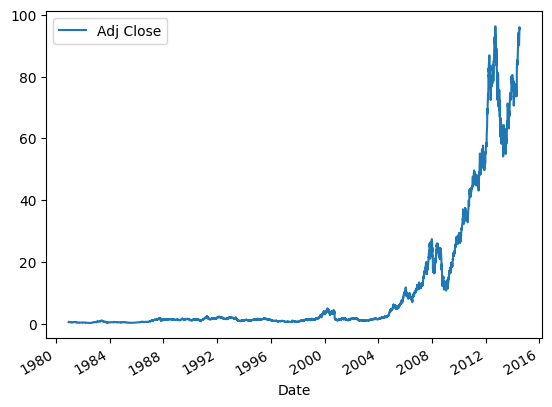

In [24]:
%matplotlib inline
apple.plot(y = 'Adj Close')

### BONUS: Create your own question and answer it.